# Project Information
* **Objective:** The main focus of this project is to showcase the ability of data cleaning in order to obtain a suitable dataset for its analysis. Also, The summary statistics and unvariate analysis will be obtained through data exploration.
* **Additional Aim:** As an engineer who has switched career paths to data science/analytics I believe that having information about the most demanded skills according to the role can be really useful for the ones who are trying to get into the world of data analytics. Therefore working and summarizing this data to obtain such an indicator is part of my personal objective in this project. 
* **Dataset:** The choosen dataset will be The 'Data Science job posting on Glassdoor' 
* **Data Privacy and Availability:** The data is available for its public use along with its license on kaggle.com


# Data Cleaning Process
* **Introduction:** It is crucial to explore and make a detailed check on each column of the data we will be working on, as it needs to be cleaned/processed afterwards. 
* **Data Issues:** The data has consistency issues in the text formats and types of some data columns. Additionally, it has handled the missing values replacing them with '-1' which in some cases it is no adequate.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import zipfile
import kaggle

In [2]:
!kaggle datasets download -d rashikrahmanpritom/data-science-job-posting-on-glassdoor


  0%|          | 0.00/1.53M [00:00<?, ?B/s]
 65%|██████▌   | 1.00M/1.53M [00:00<00:00, 1.73MB/s]
100%|██████████| 1.53M/1.53M [00:00<00:00, 2.42MB/s]
100%|██████████| 1.53M/1.53M [00:00<00:00, 2.24MB/s]


In [3]:
# Extract the files from the ZIP file
zip_name = 'data-science-job-posting-on-glassdoor.zip'
with zipfile.ZipFile(zip_name,'r') as file:
    file.extractall()

In [4]:
# Read the .csv file as a pandas dataframe
job_data = pd.read_csv('Uncleaned_DS_jobs.csv')

In [5]:
# Explore the data
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [6]:
job_data.shape

(672, 15)

In [7]:
# Check the information structure
job_data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [8]:
# Drop the index column
job_data.drop('index',axis=1,inplace=True)

In [9]:
# Check for duplicates
job_data[job_data.duplicated()].shape
job_data[job_data.duplicated()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
135,Machine Learning Engineer,$90K-$109K (Glassdoor est.),Role Description\nTriplebyte screens and evalu...,3.2,Triplebyte\n3.2,Remote,"San Francisco, CA",51 to 200 employees,2015,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
136,Senior Data Engineer,$90K-$109K (Glassdoor est.),Lendio is looking to fill a position for a Sen...,4.9,Lendio\n4.9,"Lehi, UT","Lehi, UT",201 to 500 employees,2011,Company - Private,Lending,Finance,$50 to $100 million (USD),-1
358,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
359,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
360,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
361,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
362,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
389,Data Scientist,$110K-$163K (Glassdoor est.),"Job Description\nAs a Data Scientist, you will...",-1.0,HireAi,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
496,Data Scientist,$95K-$119K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
497,Data Scientist,$95K-$119K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1


In [10]:
# Drop duplicates
job_data.drop_duplicates(inplace=True)

In [11]:
# Check the shape again
job_data.shape

(659, 14)

In [12]:
# Set appropiate column names in the form of lowercase words separated by '_'
job_data.rename(columns= lambda header: header.lower().replace(" ","_"), inplace= True)

In [13]:
# Inspect the Job title column
job_data["job_title"][:150]

0                             Sr Data Scientist
1                                Data Scientist
2                                Data Scientist
3                                Data Scientist
4                                Data Scientist
                         ...                   
147    Scientist - Biomarker and Flow Cytometry
148                              Data Scientist
149                           Analytics Manager
150                              Data Scientist
151                Staff Scientist- Upstream PD
Name: job_title, Length: 150, dtype: object

_The first encountered issue with this column is that it has data that clarifies some information related to the description of the role. e.g. skills, abbreviations, etc. This text is irrelevant except in the case it specifies the seniority. e.g. (Sr.) which should be replaced to sr. after that all the parenthesis instances along with its information can be deleted_

In [14]:
# Make the replacement
job_data["job_title"]=job_data.loc[:,"job_title"].str.replace("(Sr.)","sr.")

In [15]:
# Delete the rest of the instances using a regex
job_data["job_title"]=job_data.loc[:,"job_title"].str.extract('([^()]+)')

_Another issue is that there seems to be special characters in some of the rows. It is important to be careful here since some symbols are useful like '-' or ',' or numbers. Therefore, checking for non-alphanumeric symbols other than the ones previuosly mentioned can be also achieved._

In [16]:
#Replace the special characters with an empty value by defining a regex pattern
job_data['job_title'] = job_data['job_title'].str.replace(r'[^a-zA-Z0-9-,/\s]','',regex=True)

In [17]:
#Inspect the salary estimate column
job_data['salary_estimate'][100:200]

100    $99K-$132K (Glassdoor est.)
101    $99K-$132K (Glassdoor est.)
102    $99K-$132K (Glassdoor est.)
103    $99K-$132K (Glassdoor est.)
104    $99K-$132K (Glassdoor est.)
                  ...             
197     $56K-$97K (Glassdoor est.)
198     $56K-$97K (Glassdoor est.)
199    $79K-$106K (Glassdoor est.)
200    $79K-$106K (Glassdoor est.)
201    $79K-$106K (Glassdoor est.)
Name: salary_estimate, Length: 100, dtype: object

_This column can be transformed into three columns expressing the min, the max and the avg. salaries for a specific role._

In [18]:
# Define a function to extract the salary limits
def extract_values(text):
    extracted_integer = ''
    modified_string = ''
    
    for i in range(len(text)):
        if i+1 < len(text):
            if text[i].isdigit():
                extracted_integer += text[i]
                if not text[i+1].isdigit():
                    break
        if i == len(text) - 1 and text[i].isdigit():
            extracted_integer += text[i]
    
    if extracted_integer:
        modified_string = text[:text.find(extracted_integer)] + text[text.find(extracted_integer) + len(extracted_integer):]
        extracted_integer = int(extracted_integer)
    
    return extracted_integer, modified_string

In [19]:
#Obtain the minimum salary in the range
job_data['min_salary_K$'], job_data['salary_estimate'] = zip(*job_data['salary_estimate'].apply(extract_values))

In [20]:
#Obtain the maximum salary in the range
job_data['max_salary_K$'], job_data['salary_estimate'] = zip(*job_data['salary_estimate'].apply(extract_values))

In [21]:
#Drop the old salary range column
job_data.drop('salary_estimate', axis=1, inplace=True)

In [22]:
#Let's obtain the average of these ranges
job_data['avg_salary_estimate'] = (np.round((job_data['min_salary_K$'] + job_data['max_salary_K$'])/2,decimals=0)).astype(int)
job_data.head()

,job_title,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,min_salary_K$,max_salary_K$,avg_salary_estimate
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137,171,154
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137,171,154
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171,154


In [23]:
#Inspect the job description column
job_data['job_description'][:150]

0      Description\n\nThe Senior Data Scientist is re...
1      Secure our Nation, Ignite your Future\n\nJoin ...
2      Overview\n\n\nAnalysis Group is one of the lar...
3      JOB DESCRIPTION:\n\nDo you have a passion for ...
4      Data Scientist\nAffinity Solutions / Marketing...
                             ...                        
147    Crown Bioscience, a JSR Life Sciences company,...
148    Company Overview\n\nImagine if we could match ...
149    Responsible for both high level and granular m...
150    JOB SUMMARY\nResponsible for designing, analyz...
151    As a Staff Scientist in Upstream Process Devel...
Name: job_description, Length: 150, dtype: object

_This data can be used for categorizing the job skills. For now, we check if there are no missing/null values '-1'._

In [24]:
job_data.loc[:,"job_description"]
job_data.loc[job_data.loc[:,"job_description"]=="-1"]

,job_title,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,min_salary_K$,max_salary_K$,avg_salary_estimate


In [25]:
#Inspect the rating column
job_data['rating'][:150]

0      3.1
1      4.2
2      3.8
3      3.5
4      2.9
      ... 
147    2.4
148    2.9
149    4.4
150    2.9
151    2.7
Name: rating, Length: 150, dtype: float64

_Check for inconsistencies or missing values as well._

In [26]:
job_data['rating'].unique()

array([ 3.1,  4.2,  3.8,  3.5,  2.9,  3.9,  4.4,  3.6,  4.5,  4.7,  3.7,
        3.4,  4.1,  3.2,  4.3,  2.8,  5. ,  4.8,  3.3,  2.7,  2.2,  2.6,
        4. ,  2.5,  4.9,  2.4, -1. ,  2.3,  4.6,  3. ,  2.1,  2. ])

_As we can see there are some rows that have missing values. We should be careful in this case. If we decide to replace the value with 0 or -1 it would mean a low rating score since the values in the column are within the range of 0.0 - 5.0. If we change it to something like 'N/A' it would change the type of the column which can be counter productive for its future usage. Dropping the rows can result in a loss of valuable information about the skills required for the roles or the salary range. A good apprach would be to change it to a NaN value since it will not alter the column's type and can correctly represent a missing value_

In [27]:
# Replace rating mising values with NaN across the entire column
job_data['rating'].replace(-1.0,np.nan,inplace=True)

In [28]:
job_data['rating'].unique()

array([3.1, 4.2, 3.8, 3.5, 2.9, 3.9, 4.4, 3.6, 4.5, 4.7, 3.7, 3.4, 4.1,
       3.2, 4.3, 2.8, 5. , 4.8, 3.3, 2.7, 2.2, 2.6, 4. , 2.5, 4.9, 2.4,
       nan, 2.3, 4.6, 3. , 2.1, 2. ])

In [29]:
# Inspect the company name column
job_data['company_name'][:10]

0           Healthfirst\n3.1
1               ManTech\n4.2
2        Analysis Group\n3.8
3               INFICON\n3.5
4    Affinity Solutions\n2.9
5           HG Insights\n4.2
6              Novartis\n3.9
7                iRobot\n3.5
8         Intuit - Data\n4.4
9    XSELL Technologies\n3.6
Name: company_name, dtype: object

_We can remove the delimiter and the numbers after them using a regex to obtain only the names_

In [30]:
job_data['company_name'] = job_data.loc[:,'company_name'].str.replace(r"\n\d+(\.\d+)?",'',regex=True)
job_data.loc[:,"company_name"][:10]

0           Healthfirst
1               ManTech
2        Analysis Group
3               INFICON
4    Affinity Solutions
5           HG Insights
6              Novartis
7                iRobot
8         Intuit - Data
9    XSELL Technologies
Name: company_name, dtype: object

In [31]:
# Inspect the location column
job_data['location'][:10]

0         New York, NY
1        Chantilly, VA
2           Boston, MA
3           Newton, MA
4         New York, NY
5    Santa Barbara, CA
6        Cambridge, MA
7          Bedford, MA
8        San Diego, CA
9          Chicago, IL
Name: location, dtype: object

_We can add a new column specifying the state of the job_

In [32]:
# Check the counts of each unique location state
job_data.loc[:,"location"].apply(lambda x: x.split(",")[-1]).value_counts()

location
 CA              154
 VA               89
 MA               62
 NY               52
 MD               40
 IL               30
 DC               26
 TX               17
 WA               16
 OH               14
 PA               12
 MO               12
United States     11
 NJ               10
 CO               10
 NC                9
 GA                9
 TN                8
 FL                8
 OK                6
 WI                6
Remote             5
 IN                5
 MI                5
 CT                4
 AL                4
 MN                4
 AZ                4
 NE                3
 IA                3
 RI                2
New Jersey         2
 SC                2
 OR                2
 UT                2
Utah               2
 NH                2
 MS                1
 LA                1
 KS                1
Texas              1
 DE                1
California         1
 WV                1
Name: count, dtype: int64

In [33]:
# Create the state column
job_data['location_state'] = job_data['location'].apply(lambda x: x.split(',')[-1].strip())

In [34]:
# Replace the inconsistencies with their correct state abbreviation
def clean_location(jobs):
    return (
        jobs.loc[:, "location_state"]
        .replace("California","CA")
        .replace("Texas","TX")
        .replace("Utah","UT")
        .replace("New Jersey","NJ")
        .replace("Remote","n/a")
        .replace("United States","n/a")
    )

job_data = job_data.assign(
    location_state = clean_location
)

In [35]:
job_data["location_state"].value_counts()

location_state
CA     155
VA      89
MA      62
NY      52
MD      40
IL      30
DC      26
TX      18
WA      16
n/a     16
OH      14
NJ      12
PA      12
MO      12
CO      10
GA       9
NC       9
FL       8
TN       8
OK       6
WI       6
MI       5
IN       5
AZ       4
CT       4
MN       4
AL       4
UT       4
IA       3
NE       3
SC       2
OR       2
RI       2
NH       2
MS       1
LA       1
KS       1
DE       1
WV       1
Name: count, dtype: int64

In [36]:
# Check if the location of the job and the HQ are in the place
job_data['same_state'] = (job_data['location'] == job_data['headquarters']).astype(int)

In [37]:
job_data.head()

,job_title,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,min_salary_K$,max_salary_K$,avg_salary_estimate,location_state,same_state
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154,NY,1
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137,171,154,VA,0
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137,171,154,MA,1
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154,MA,0
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171,154,NY,1


In [38]:
# Inspect the headquarters column
job_data['headquarters'].value_counts()

headquarters
New York, NY         33
San Francisco, CA    30
Chicago, IL          23
-1                   20
Boston, MA           19
                     ..
Scottsdale, AZ        1
Greensboro, NC        1
Newark, CA            1
Richmond, VA          1
Fort Lee, NJ          1
Name: count, Length: 229, dtype: int64

_We need to correctly handle the -1 as missing values._

In [39]:
job_data['headquarters'] = job_data['headquarters'].apply(lambda x: x.replace('-1','n/a'))
job_data["headquarters"].value_counts()

headquarters
New York, NY         33
San Francisco, CA    30
Chicago, IL          23
n/a                  20
Boston, MA           19
                     ..
Scottsdale, AZ        1
Greensboro, NC        1
Newark, CA            1
Richmond, VA          1
Fort Lee, NJ          1
Name: count, Length: 229, dtype: int64

In [40]:
# Inspect the size column
print(job_data['size'][:100])
job_data['size'].unique()

0      1001 to 5000 employees
1     5001 to 10000 employees
2      1001 to 5000 employees
3       501 to 1000 employees
4         51 to 200 employees
               ...           
95    5001 to 10000 employees
96        51 to 200 employees
97           10000+ employees
98        51 to 200 employees
99     1001 to 5000 employees
Name: size, Length: 100, dtype: object


array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', '-1', 'Unknown'],
      dtype=object)

_We can handle the missing values of -1 and Unknown in a more appropiate way. Let's say 'n/a' so we do not change the type of the column and we have a unique value to represent the missing ones._

In [41]:
# Handle the missing values correctly
def size_cleaning(jobs):
    return (
        jobs.loc[:, "size"]
        .replace("-1","n/a")
        .replace("Unknown","n/a")
    )

job_data = job_data.assign(
    size = size_cleaning
)

In [42]:
job_data['size'].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', 'n/a'], dtype=object)

In [43]:
# Inspect the founded column
job_data['founded'][:100]

0     1993
1     1968
2     1981
3     2000
4     1998
      ... 
95    1983
96    2015
97    1911
98    2009
99    1959
Name: founded, Length: 100, dtype: int64

In [44]:
#Clean the missing values
job_data['founded'].replace(-1,np.nan,inplace=True)
job_data['founded'].unique()

array([1993., 1968., 1981., 2000., 1998., 2010., 1996., 1990., 1983.,
       2014., 2012., 2016., 1965., 1973., 1986., 1997., 2015., 1945.,
       1988., 2017., 2011., 1967., 1860., 1992., 2003., 1951., 2005.,
       2019., 1925., 2008., 1999., 1978., 1966., 1912., 1958., 2013.,
       1849., 1781., 1926., 2006., 1994., 1863., 1995.,   nan, 1982.,
       1974., 2001., 1985., 1913., 1971., 1911., 2009., 1959., 2007.,
       1939., 2002., 1961., 1963., 1969., 1946., 1957., 1953., 1948.,
       1850., 1851., 2004., 1976., 1918., 1954., 1947., 1955., 2018.,
       1937., 1917., 1935., 1929., 1820., 1952., 1932., 1894., 1960.,
       1788., 1830., 1984., 1933., 1880., 1887., 1970., 1942., 1980.,
       1989., 1908., 1853., 1875., 1914., 1898., 1956., 1977., 1987.,
       1896., 1972., 1949., 1962.])

_This column represents the year when the company was founded. We can obtain the number of years the company has been in the market, which can be useful for future analysis, then drop the original column._

In [45]:
# obtain the years the company has been in the market and drop the founed column
current_year = datetime.now().year
job_data['years_in_market'] = current_year - job_data['founded']
job_data.drop('founded',axis=1,inplace=True)
job_data.head()

,job_title,job_description,rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,revenue,competitors,min_salary_K$,max_salary_K$,avg_salary_estimate,location_state,same_state,years_in_market
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154,NY,1,30.0
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137,171,154,VA,0,55.0
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137,171,154,MA,1,42.0
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154,MA,0,23.0
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171,154,NY,1,25.0


In [46]:
# Inspect the Type of ownership column
job_data['type_of_ownership'][:100]

0      Nonprofit Organization
1            Company - Public
2     Private Practice / Firm
3            Company - Public
4           Company - Private
               ...           
95           Company - Public
96          Company - Private
97          Company - Private
98          Company - Private
99         Other Organization
Name: type_of_ownership, Length: 100, dtype: object

In [47]:
job_data['type_of_ownership'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', '-1',
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

_We can change the format of some values like 'Public' or 'Private' while also dealing with the missing values like the previous column._

In [48]:
def ownership(jobs):
    return (
        jobs.loc[:, "type_of_ownership"]
        .replace("Nonprofit Organization","Nonprofit")
        .replace("-1","n/a")
        .replace("Unknown","n/a")
        .replace("Company - Public","Public")
        .replace("Company - Private","Private")
        .replace("Other Organization","Other")   
    )

job_data = job_data.assign(
    type_of_ownership = ownership
)

In [49]:
job_data['type_of_ownership'].unique()

array(['Nonprofit', 'Public', 'Private Practice / Firm', 'Private',
       'Government', 'Subsidiary or Business Segment', 'Other', 'n/a',
       'Hospital', 'Self-employed', 'College / University', 'Contract'],
      dtype=object)

In [50]:
# Inspect the industry column
job_data['industry'].value_counts()

industry
Biotech & Pharmaceuticals                   66
IT Services                                 61
-1                                          60
Computer Hardware & Software                56
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      7
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food

_In this case we just need to handle the missing values correctly._

In [51]:
job_data["industry"] = job_data["industry"].apply(lambda x: x.replace("-1","n/a"))
job_data['industry'].unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', 'n/a', 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil

In [52]:
# Inspect the sector column
job_data['sector'].value_counts()

sector
Information Technology                187
Business Services                     120
Biotech & Pharmaceuticals              66
-1                                     60
Aerospace & Defense                    46
Finance                                32
Insurance                              32
Manufacturing                          23
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities           10
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: count, dtype: int64

In [53]:
job_data['sector'] = job_data['sector'].apply(lambda x: x.replace("-1","n/a"))
job_data['sector'].unique()

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', 'n/a',
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

In [54]:
# Inspect the revenue column
job_data['revenue'].value_counts()

revenue
Unknown / Non-Applicable            212
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$1 to $5 million (USD)               31
$50 to $100 million (USD)            30
$500 million to $1 billion (USD)     19
-1                                   16
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: count, dtype: int64

_we should follow the same process for missing numbers and also get rid of the parenthesis._

In [55]:
def revenue_cleanup(jobs):
    return (
        jobs.loc[:, "revenue"]
        .replace("-1","n/a")
        .replace("Unknown / Non-Applicable","n/a")
    )

job_data = job_data.assign(
    revenue = revenue_cleanup
)

In [56]:
job_data['revenue']=job_data.loc[:,'revenue'].str.extract('([^()]+)')
job_data['revenue'].value_counts()

revenue
n/a                            228
$100 to $500 million            94
$10+ billion                    63
$2 to $5 billion                45
$10 to $25 million              41
$1 to $2 billion                36
$25 to $50 million              36
$1 to $5 million                31
$50 to $100 million             30
$500 million to $1 billion      19
$5 to $10 million               14
Less than $1 million            14
$5 to $10 billion                8
Name: count, dtype: int64

In [57]:
# Finally inspect the competitors column
job_data['competitors'].value_counts()


competitors
-1                                                                488
Roche, GlaxoSmithKline, Novartis                                   10
Los Alamos National Laboratory, Battelle, SRI International         6
Leidos, CACI International, Booz Allen Hamilton                     6
MIT Lincoln Laboratory, Lockheed Martin, Northrop Grumman           3
                                                                 ... 
Pfizer, GlaxoSmithKline                                             1
Square, Amazon, Apple                                               1
Lumentum Operations, Keysight Technologies, O-Net Technologies      1
Munich Re, Hannover RE, SCOR                                        1
Genomic Health, Myriad Genetics, The Broad Institute                1
Name: count, Length: 108, dtype: int64

_The most frequent value of this column is '-1'. We can check the percentage of this in order to decide to drop it or not. In addition to this, we also consider the low importance of this information._

In [58]:
np.round((488/659)*100,decimals=2)

74.05

In [59]:
#The percentage is too high so we drop this column
job_data.drop('competitors',axis=1,inplace=True)

In [60]:
job_data.head()

,job_title,job_description,rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,revenue,min_salary_K$,max_salary_K$,avg_salary_estimate,location_state,same_state,years_in_market
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit,Insurance Carriers,Insurance,n/a,137,171,154,NY,1,30.0
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Public,Research & Development,Business Services,$1 to $2 billion,137,171,154,VA,0,55.0
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million,137,171,154,MA,1,42.0
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million,137,171,154,MA,0,23.0
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Private,Advertising & Marketing,Business Services,n/a,137,171,154,NY,1,25.0


In [61]:
# Check if we have any '-1' as missing values
job_data[job_data.eq('-1').any(axis = 1)]

,job_title,job_description,rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,revenue,min_salary_K$,max_salary_K$,avg_salary_estimate,location_state,same_state,years_in_market


In [62]:
# Check if we have a numerical missing value in any column 
job_data[job_data.eq(-1).any(axis = 1)]

,job_title,job_description,rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,revenue,min_salary_K$,max_salary_K$,avg_salary_estimate,location_state,same_state,years_in_market


_We can proceed by adding an additional column that can help us catergorize the job roles into 4 specific roles for the EDA part._

In [63]:
# Define a simplification function

def role_defining(title): 
    if any(keyword in title.lower() for keyword in ['data scientist', 'data science']):
        return 'Data Scientist'
    elif any(keyword in title.lower() for keyword in ['data analyst', 'analyst']):
        return 'Data Analyst'
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    elif any(keyword in title.lower() for keyword in ['machine learning', 'ai']):
        return 'Machine Learning Engineer'
    else:
        return 'Other'

In [64]:
# Apply the function to the new column
job_data['job_role']= job_data['job_title'].apply(role_defining)
job_data['job_role'].value_counts()

job_role
Data Scientist               462
Other                         63
Data Analyst                  54
Data Engineer                 45
Machine Learning Engineer     35
Name: count, dtype: int64

_Proceed in a similar way to obtain the level of seniority in a new column._

In [65]:
def seniority_defining(title,description):
    if any(keyword in title.lower() for keyword in ['jr.','jr','junior']) or any(keyword in description.lower() for keyword in ['jr.','jr','junior']):
        return 'Jr'
    elif any(keyword in title.lower() for keyword in ['sr.','sr','vp','senior']) or any(keyword in description.lower() for keyword in ['sr.','sr','vp','senior']):
        return 'Sr'
    else:
        return 'Mid-Level'
    

job_data['job_seniority'] = job_data.apply(lambda row: seniority_defining(row['job_title'], row['job_description']), axis=1)
job_data['job_seniority'].value_counts()

job_seniority
Mid-Level    422
Sr           201
Jr            36
Name: count, dtype: int64

In [66]:
job_data.head()

,job_title,job_description,rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,revenue,min_salary_K$,max_salary_K$,avg_salary_estimate,location_state,same_state,years_in_market,job_role,job_seniority
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit,Insurance Carriers,Insurance,n/a,137,171,154,NY,1,30.0,Data Scientist,Sr
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Public,Research & Development,Business Services,$1 to $2 billion,137,171,154,VA,0,55.0,Data Scientist,Mid-Level
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million,137,171,154,MA,1,42.0,Data Scientist,Mid-Level
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million,137,171,154,MA,0,23.0,Data Scientist,Mid-Level
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Private,Advertising & Marketing,Business Services,n/a,137,171,154,NY,1,25.0,Data Scientist,Mid-Level


_Finally we need to obtain the technical skills required for each job posting. We can achieve this by creating binary columns named after each skill and then checking if the skill is found in the description column. According to that result we can set 1 or 0 to each binary column for each job post._

In [67]:
# Create dummy columns for each of the skill considered.
job_data['excel'] = job_data.apply(lambda x: 1 if 'excel' in x.job_description.lower() else 0, axis=1)
job_data['sql'] = job_data.apply(lambda x: 1 if 'sql' in x.job_description.lower() else 0, axis=1)
job_data['python'] = job_data.apply(lambda x: 1 if 'python' in x.job_description.lower() else 0, axis=1)
job_data['power_bi'] = job_data.apply(lambda x: 1 if 'power bi' in x.job_description.lower() else 0, axis=1)
job_data['tableau'] = job_data.apply(lambda x: 1 if 'tableau' in x.job_description.lower() else 0, axis=1)
job_data['scikit'] = job_data.apply(lambda x: 1 if 'scikit' in x.job_description.lower() else 0, axis=1)
job_data['spark'] = job_data.apply(lambda x: 1 if 'spark' in x.job_description.lower() else 0, axis=1)

In [68]:
print(job_data['excel'].value_counts())
print(job_data['sql'].value_counts())
print(job_data['python'].value_counts())
print(job_data['power_bi'].value_counts())
print(job_data['tableau'].value_counts())
print(job_data['scikit'].value_counts())
print(job_data['spark'].value_counts())

excel
0    364
1    295
Name: count, dtype: int64
sql
1    354
0    305
Name: count, dtype: int64
python
1    479
0    180
Name: count, dtype: int64
power_bi
0    625
1     34
Name: count, dtype: int64
tableau
0    537
1    122
Name: count, dtype: int64
scikit
0    592
1     67
Name: count, dtype: int64
spark
0    482
1    177
Name: count, dtype: int64


In [69]:
job_data.head()

,job_title,job_description,rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,...,years_in_market,job_role,job_seniority,excel,sql,python,power_bi,tableau,scikit,spark
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit,Insurance Carriers,Insurance,...,30.0,Data Scientist,Sr,0,0,0,0,0,0,0
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Public,Research & Development,Business Services,...,55.0,Data Scientist,Mid-Level,0,1,0,0,0,0,0
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,...,42.0,Data Scientist,Mid-Level,1,0,1,0,0,0,0
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Public,Electrical & Electronic Manufacturing,Manufacturing,...,23.0,Data Scientist,Mid-Level,1,1,1,0,0,0,0
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Private,Advertising & Marketing,Business Services,...,25.0,Data Scientist,Mid-Level,1,1,1,0,0,0,0


In [70]:
job_data.to_csv('Cleaned_Job_Data.csv',index= False)
job_data.to_excel('Cleaned_Job_Data.xlsx',index=False)

# Exploratory Data Analysis
Now that we have covered the cleaning section and obtained a robust dataset, we can proceed to analyze the data to obtain the most significant features and statistics from it.

In [71]:
# Include the necessary packages fro analysisi and visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
# Obtain the basic statistics of the data frame
job_data.describe()

,rating,min_salary_K$,max_salary_K$,avg_salary_estimate,same_state,years_in_market,excel,sql,python,power_bi,tableau,scikit,spark
count,620.000000,659.000000,659.000000,659.000000,659.000000,552.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000
mean,3.881290,99.066768,148.464340,123.761760,0.406677,39.000000,0.447648,0.537178,0.726859,0.051593,0.185129,0.101669,0.268589
std,0.609805,33.266335,48.387744,39.944445,0.491587,40.689787,0.497629,0.498995,0.445911,0.221373,0.388697,0.302442,0.443562
min,2.000000,31.000000,56.000000,44.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,79.000000,119.000000,103.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,91.000000,133.000000,114.000000,0.000000,24.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.400000,122.000000,165.000000,136.000000,1.000000,49.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,212.000000,331.000000,272.000000,1.000000,242.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


c:\ProgramData\anaconda3\envs\data1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\data1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\data1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\data1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

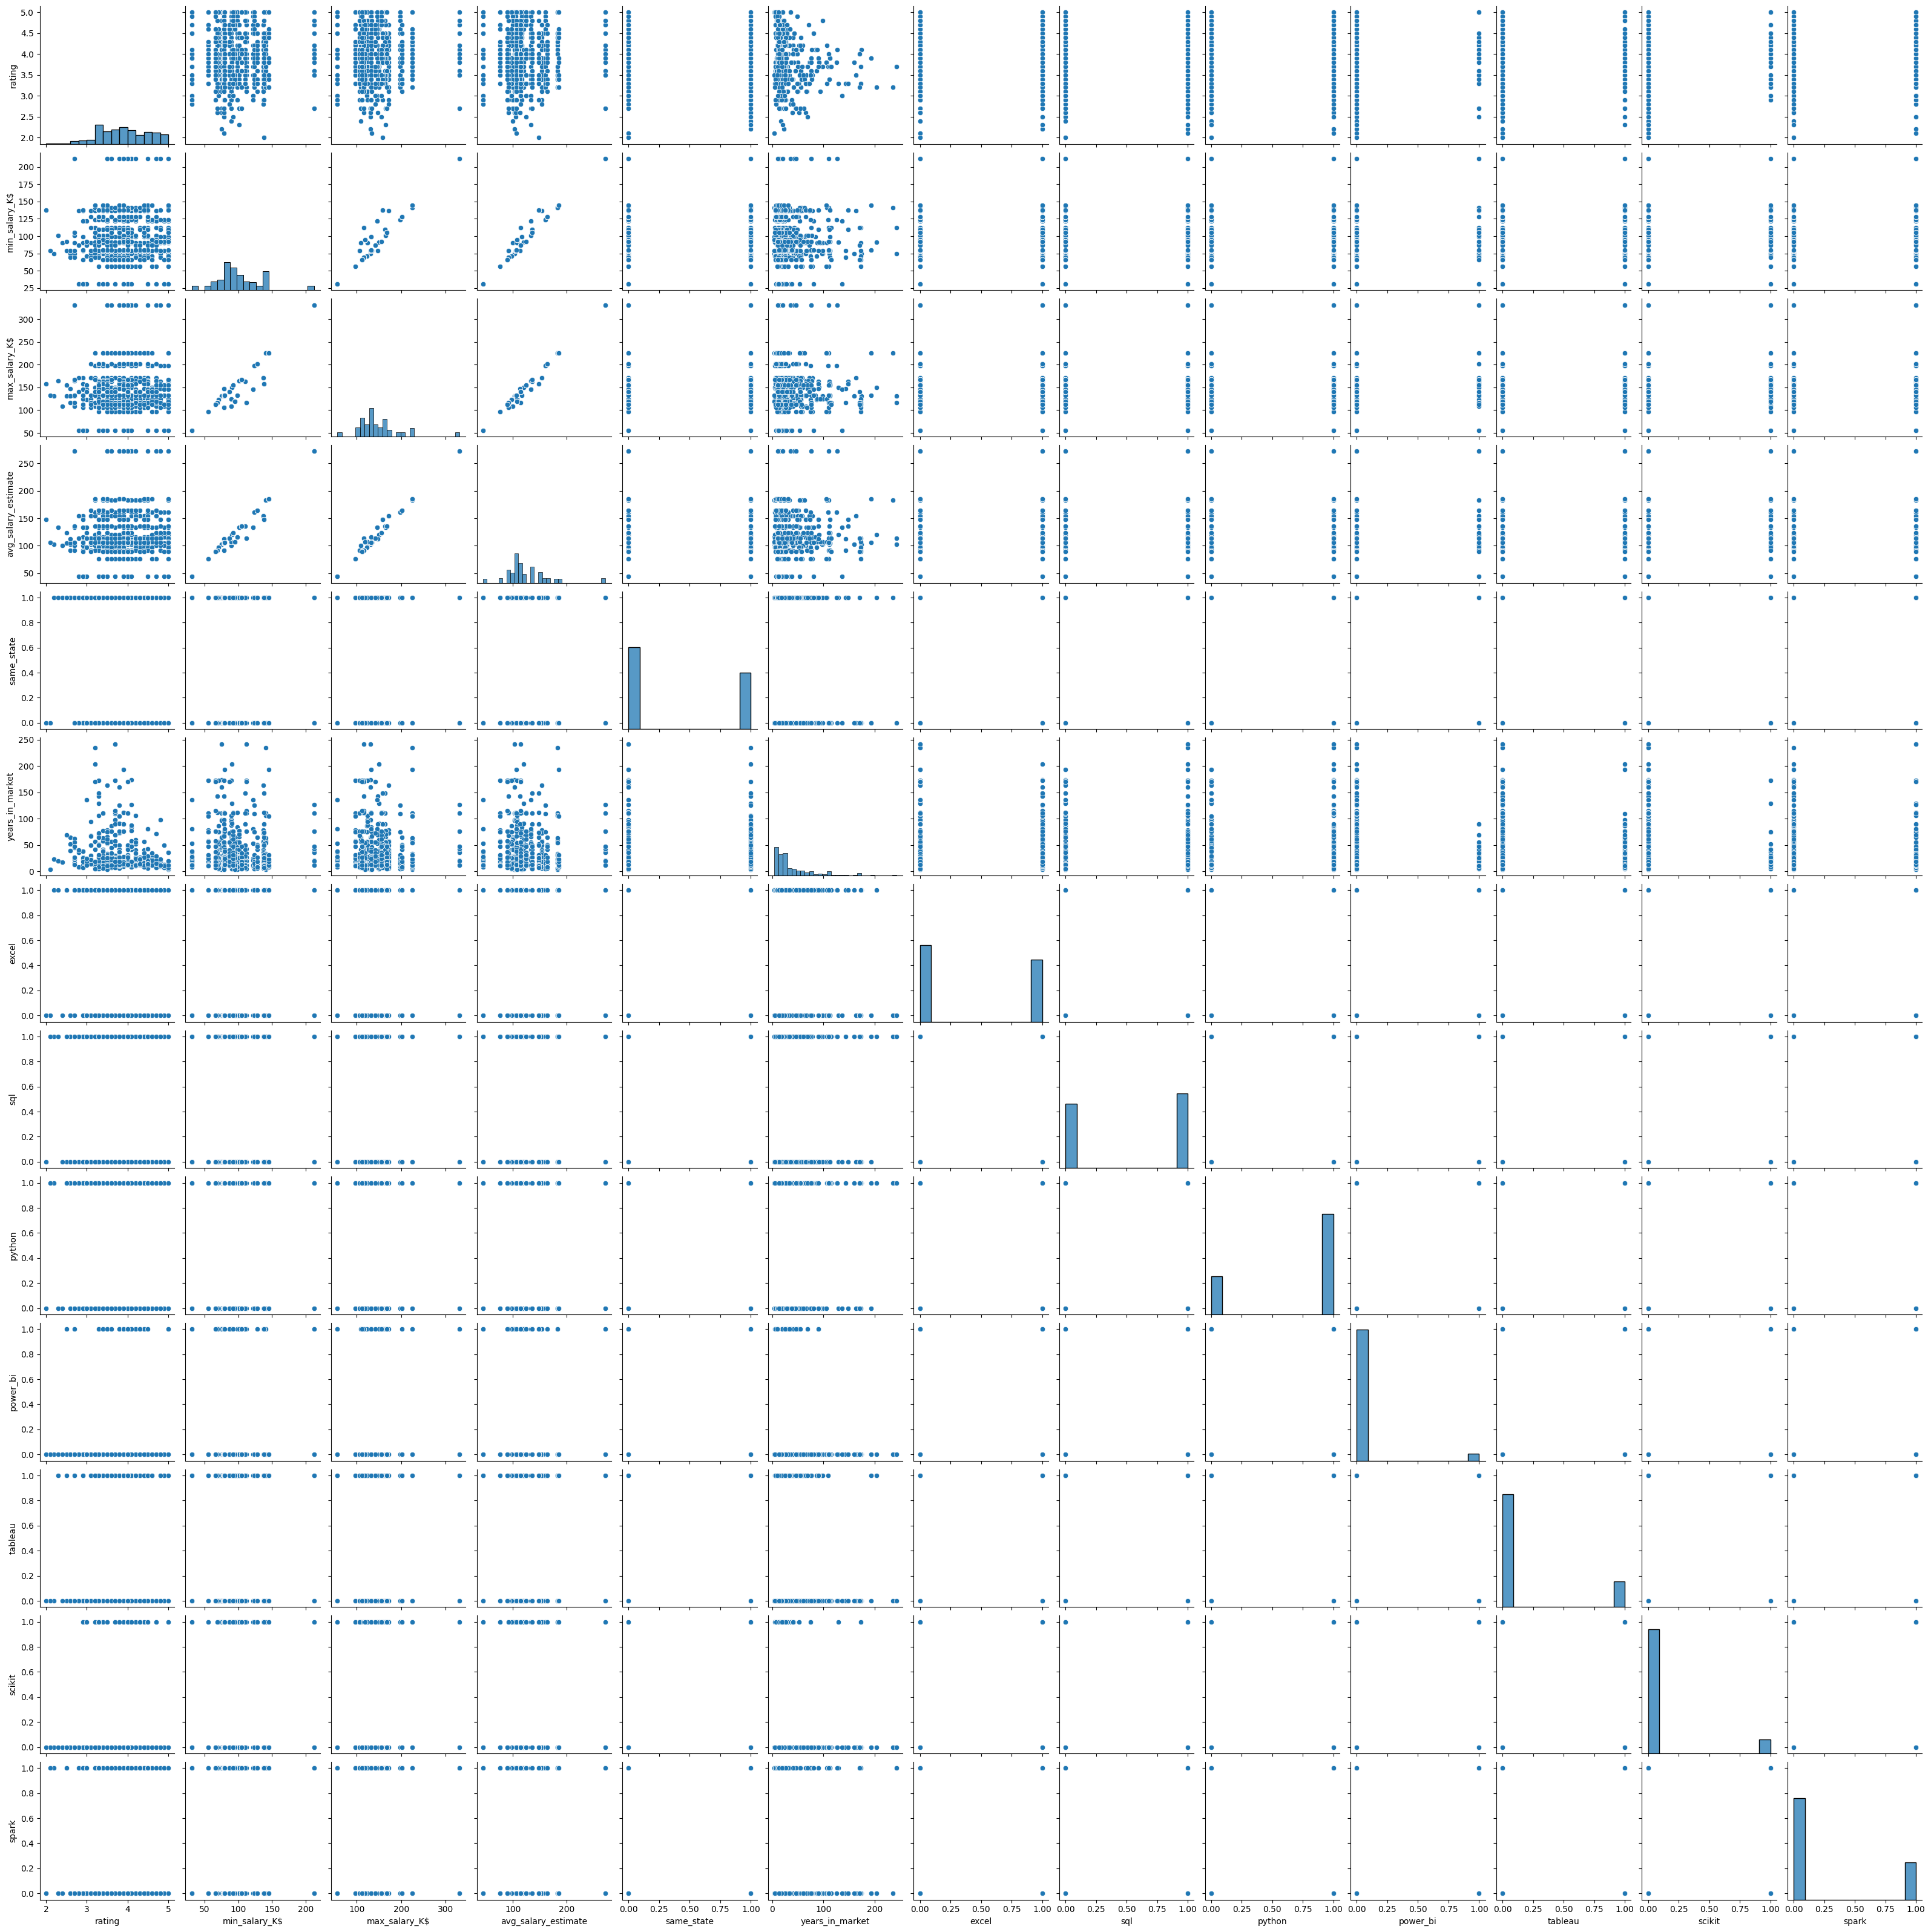

In [73]:
#Obtain the relationships between columns
sns.pairplot(job_data)

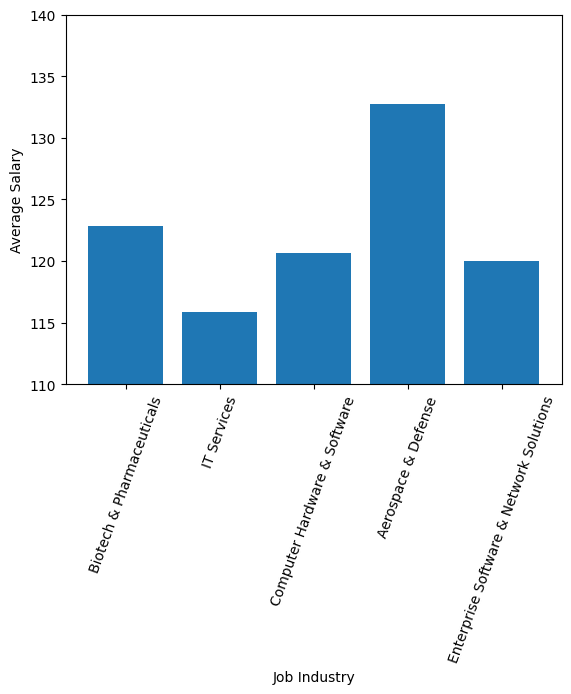

In [74]:
industry_salary = [
    round(job_data.loc[job_data["industry"]=="Biotech & Pharmaceuticals","avg_salary_estimate"].mean(), 2),
    round(job_data.loc[job_data["industry"]=="IT Services","avg_salary_estimate"].mean(), 2),
    round(job_data.loc[job_data["industry"]=="Computer Hardware & Software","avg_salary_estimate"].mean(), 2),
    round(job_data.loc[job_data["industry"]=="Aerospace & Defense","avg_salary_estimate"].mean(), 2),
    round(job_data.loc[job_data["industry"]=="Enterprise Software & Network Solutions","avg_salary_estimate"].mean(), 2)
]

top_paying_industries = [
    "Biotech & Pharmaceuticals",
    "IT Services",
    "Computer Hardware & Software",
    "Aerospace & Defense",
    "Enterprise Software & Network Solutions"
]

plt.bar(top_paying_industries, industry_salary)
plt.ylim(110, 140)
plt.xlabel("Job Industry")
plt.ylabel("Average Salary")

# Rotate the x-axis labels by 70 degrees
plt.xticks(rotation=70)

plt.show()

c:\ProgramData\anaconda3\envs\data1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='avg_salary_estimate'>

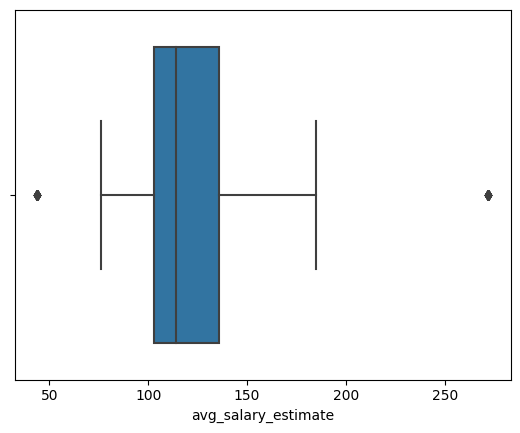

In [75]:
# Let's start by analyzing the average salary for job postings
sns.boxplot(x=job_data['avg_salary_estimate'])

In [76]:
# We can define a new data frame to fit in better inside the avg. salary range
df = job_data[(job_data.avg_salary_estimate > 50) & (job_data.avg_salary_estimate < 200)] 

In [77]:
df.shape

(618, 26)

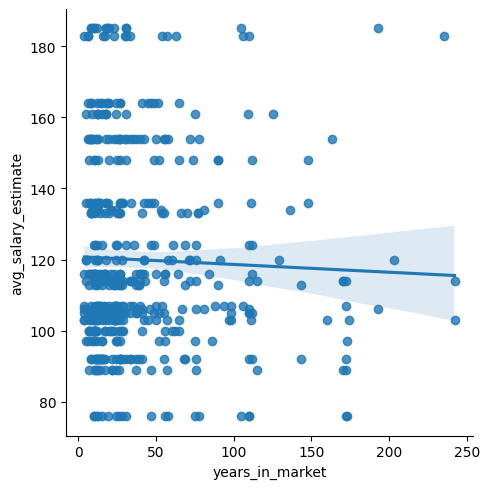

In [78]:
# Make a comparison between the years the company has been in the market and the avg. salary.
sns.lmplot(x='years_in_market',y='avg_salary_estimate',data=df)


<Axes: >

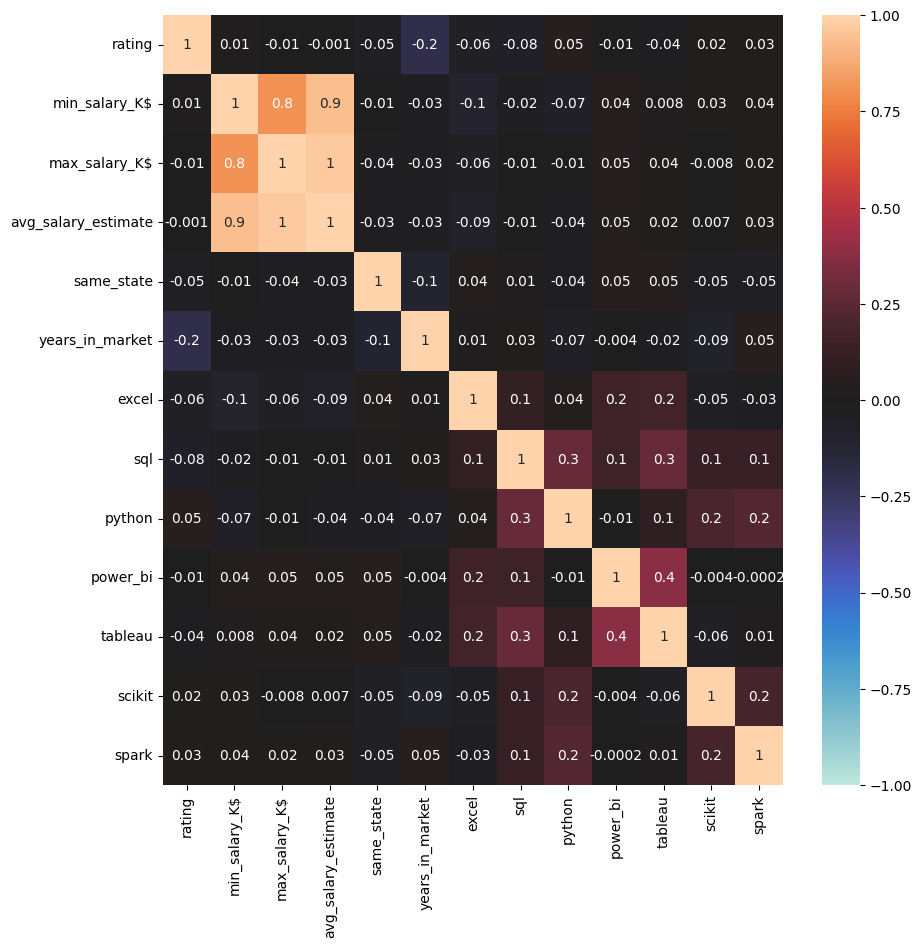

In [79]:
# Generate a heatmap based on the numerical columns of the dataframe
fig, ax = plt.subplots(figsize=(10,10)) 
matrix = np.triu(df.select_dtypes(include=[np.number]).corr())
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0,  ax=ax)

c:\ProgramData\anaconda3\envs\data1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\data1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\data1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


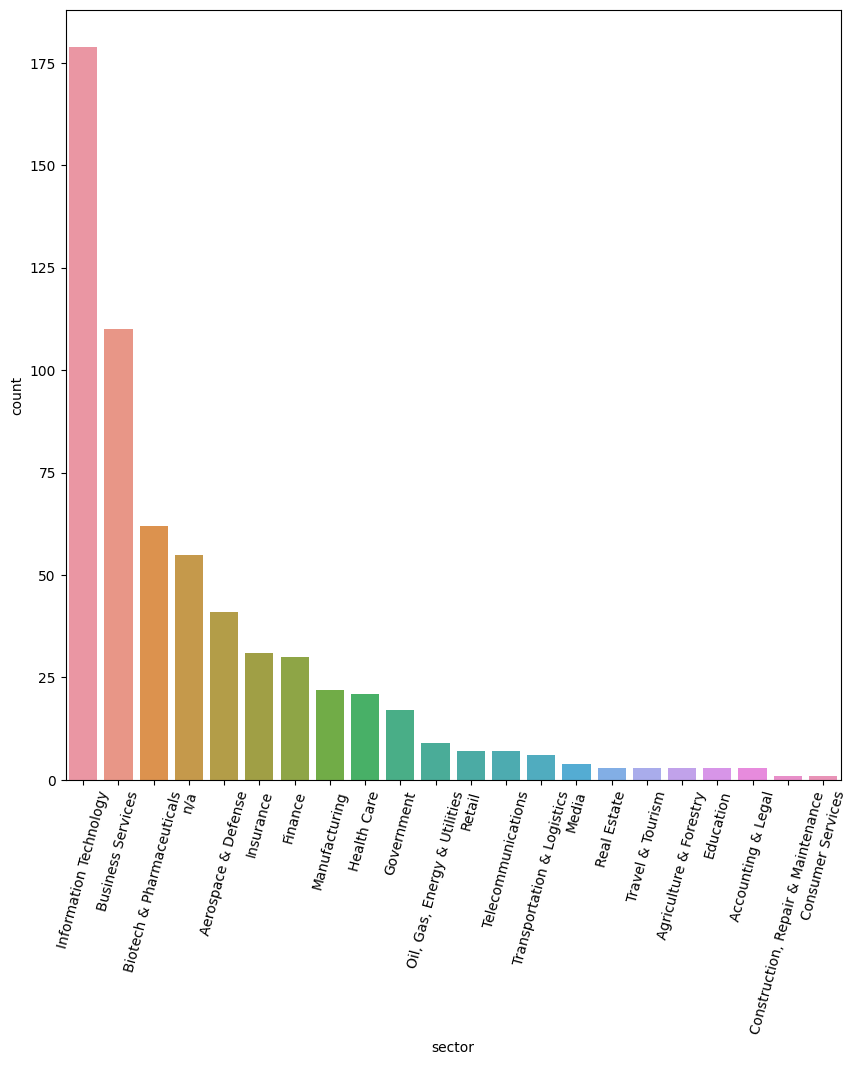

In [80]:
# Check the sector values
fig, ax = plt.subplots(figsize=(10,10)) 
chart = sns.barplot(x=df.sector.value_counts().index, y=df.sector.value_counts())
_= chart.set_xticklabels(chart.get_xticklabels(), rotation=75)

In [81]:
# Set a simpler name
df.rename(columns={'avg_salary_estimate':'avg_salary'}, inplace= True)

C:\Users\brian\AppData\Local\Temp\ipykernel_3756\3862270992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'avg_salary_estimate':'avg_salary'}, inplace= True)


In [82]:
# Obtain the avg. salary for each type of role
pd.pivot_table(df,index='job_role', values='avg_salary')

,avg_salary
job_role,
Data Analyst,118.923077
Data Engineer,115.318182
Data Scientist,122.747100
Machine Learning Engineer,113.727273
Other,121.586207


In [83]:
# Obtain the avg. salary based on the seniority of the roles
pd.pivot_table(df, index=['job_role','job_seniority'], values='avg_salary').sort_values('avg_salary', ascending =False)

,,avg_salary
job_role,job_seniority,
Other,Mid-Level,126.131579
Data Analyst,Sr,125.384615
Data Scientist,Mid-Level,124.335689
Machine Learning Engineer,Sr,122.642857
Data Scientist,Sr,121.543307
Other,Sr,117.666667
Data Engineer,Mid-Level,116.062500
Data Analyst,Mid-Level,114.833333
Data Engineer,Sr,113.888889


In [84]:
df.head()

,job_title,job_description,rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,...,years_in_market,job_role,job_seniority,excel,sql,python,power_bi,tableau,scikit,spark
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit,Insurance Carriers,Insurance,...,30.0,Data Scientist,Sr,0,0,0,0,0,0,0
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Public,Research & Development,Business Services,...,55.0,Data Scientist,Mid-Level,0,1,0,0,0,0,0
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,...,42.0,Data Scientist,Mid-Level,1,0,1,0,0,0,0
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Public,Electrical & Electronic Manufacturing,Manufacturing,...,23.0,Data Scientist,Mid-Level,1,1,1,0,0,0,0
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Private,Advertising & Marketing,Business Services,...,25.0,Data Scientist,Mid-Level,1,1,1,0,0,0,0


_Finally we can generate a table which shows the percentage of job posts that required certain skill for a determined job role._

In [85]:

# Define a custom aggregation function to get the percentage of descriptions that include certain skill.
def ones_percentage(x):
    return round((sum(1 for value in x if value == 1)/len(x))*100,2)

# Create the pivot table with the custom aggregation function
pivot_table = pd.pivot_table(df, index='job_role', values=['excel', 'sql', 'python', 'power_bi', 'tableau', 'scikit', 'spark'], aggfunc=ones_percentage)

print(pivot_table)

                           excel  power_bi  python  scikit  spark    sql  \
job_role                                                                   
Data Analyst               55.77      9.62   51.92    0.00   9.62  73.08   
Data Engineer              47.73     11.36   79.55    0.00  40.91  84.09   
Data Scientist             43.85      4.64   79.35   12.99  29.93  53.13   
Machine Learning Engineer  18.18      0.00   75.76   27.27  15.15  36.36   
Other                      46.55      0.00   34.48    0.00  13.79  27.59   

                           tableau  
job_role                            
Data Analyst                 51.92  
Data Engineer                13.64  
Data Scientist               17.87  
Machine Learning Engineer     0.00  
Other                         8.62  


# Share
* **Findings:** Based on the summary statistics and the calculations of the average salary per role, it's evident that the 'Data Scientist' role commands the highest compensation among all the job postings that have been analyzed. However, it's important to note that the data collection process and the primary focus of this database were centered around data science positions. Consequently, these results may be inherently biased toward data science roles. In addition to the provided information, it is evident that many data-related roles prioritize candidates with extensive seniority, emphasizing the importance of a candidate's experience level. When we examine the most in-demand industries, we not only identify the top five industries but also discover that the "aerospace and defense" sector stands out as the highest-paying industry in demand.
Furthermore, when delving into the skill-related data, a clear trend emerges: 'Python' and 'SQL' are not only predominant but also essential for virtually all data science and analysis positions. It's worth noting that other popular tools like 'Excel' also demonstrate significant demand across all the analyzed roles.

# Act
* **Conclusion:** After conducting thorough and extensive data cleaning, we have obtained a robust and comprehensible database. Upon exploring this data, several key insights emerge. Data-related roles exhibit substantial demand across various industries, with hardware, aerospace and defense, biotech, and networking sectors standing out due to their high-paying positions.
Moreover, it's evident that many of the higher-paying roles require a significant level of experience, which may be a concern for individuals aspiring to become data scientists or those transitioning to this field. However, it's important to note that the most sought-after skills for these roles, such as 'Python,' 'SQL,' and 'Tableau,' are skills that can be successfully mastered with dedicated effort. They also serve as an excellent entry point into the world of data science.